# Анализ работы рекламных кампаний, запущенных пятью медиа-байерами для привлечения пользователей в мобильное приложение.

**Задача:**
Исследовать данные и получить из них выводы, которые могут быть полезны для дальнейшей работы медиабайеров. 

In [1]:
import pandas as pd
import plotly.express as px

import plotly.io as pio
pio.renderers.default='notebook'

In [2]:
url='https://drive.google.com/file/d/1za9pEGr_XtLsfGAD4iTrfpfgmYVUzhWq/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [3]:
pd.options.display.float_format = '{:20,.2f}'.format

# Создаём датафрейм с основной сводной информацией
def info_df(dataframe):
    info = pd.DataFrame()

    info['dtype'] = [dataframe[x].dtype for x in df.columns]
    info.index = dataframe.columns
    info['count'] = [dataframe[x].count() for x in dataframe.columns]
    info['na, %'] = round(dataframe.isna().sum() * 100 / len(dataframe), 2)
    info['nunique'] = [dataframe[x].nunique() for x in dataframe.columns]
    info['min'] = [dataframe[x].min() for x in dataframe.columns]
    info['mean'] = [pd.to_numeric(dataframe[x], errors='coerce').mean() for x in dataframe.columns]
    info['max'] = [dataframe[x].max() for x in dataframe.columns]
    return info
display(info_df(df))

df.head()

,dtype,count,"na, %",nunique,min,mean,max
Campaign_id,int64,87,0.00,87,1,44.00,87
Geo,object,87,0.00,7,australia oceania,NaN,western europe
Buyer,object,87,0.00,5,buyer_1,NaN,buyer_5
Impressions,int64,87,0.00,87,2185,"114,057.22",3456974
Clicks,int64,87,0.00,87,53,"3,804.49",129508
Installs,int64,87,0.00,86,10,"1,211.85",33054
Registrations,int64,87,0.00,79,2,769.06,21932
Spend,object,87,0.00,85,"105,849998",21.00,"99,58"
Revenue_ad1d,object,87,0.00,87,"0,368663",NaN,"96,156985"
Revenue_in_app1d,object,87,0.00,37,0,0.00,"9,77"


,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
0,1,north america,buyer_1,3456974,129508,33054,21932,"3208,440002","1163,521408","162,220001",64,"1381,310062","199,749999",79,"1527,013835","276,629998",83
1,2,north america,buyer_2,245542,6306,3401,2448,"1569,519999","833,059639","37,25",17,"1200,964697","69,340001",19,"1449,001828","120,250001",22
2,3,north america,buyer_1,1281103,35724,13315,8101,"1231,999998","459,6826","3,26",4,"524,987826","24,7",6,"572,633765","24,7",6
3,4,north america,buyer_1,215538,9987,3119,1857,"1228,129999","602,77816","26,13",11,"830,113889","33,439999",12,"1042,831595","57,530002",12
4,5,western europe,buyer_2,335878,7343,3952,2955,"872,570005","427,807238","19,030001",4,"577,039081","20,640001",5,"714,554179","32,150001",6


Описание данных:

* `Campaign_id` - ID кампании;
* `Geo` - геопозиция, на которую настроена рекламная кампания;
* `Buyer` - байер, выполнивший запуск;
* `Impressions` - количество показов рекламных объявлений;
* `Clicks` - количество кликов; 
* `Installs` - количество установок;
* `Registrations` - количество регистраций;
* `Spend` - Затраченная сумма;
* `Revenue_ad` (1d/7d/30d) - Выручка с рекламы от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни;
* `Revenue_in_app` (1d/7d/30d) - Выручка с покупок от пользователей, зарегистрировавшихся в приложении, на 1/7/30 день их жизни;
* `Payers` (1d/7d/30d) - Количество покупателей в приложении на 1/7/30 день их жизни.

Пустые значения отсутствуют, однако некоторые типы столбцов следует привести к более удобному для анализа.

In [4]:
# Приводим названия колонок к нижнему регистру
df.columns = df.columns.str.lower()

# Массив с английскими названиями стран
eng_countries_names = ['north america', 'western europe', 'cis', 'north africa',
                       'latin america', 'tropical africa', 'australia oceania']

# Массив с русскими названиями стран
rus_countries_names = ['Северная Америка', 'Восточная Европа', 'СНГ', 'Северная Африка',
                       'Латинская Америка', 'Тропическая Африка', 'Австралия и Океания']

# Переименовываем английские названия стран на русские для удобства читаемости на графиках в дальнейшем
for num in range(0, len(eng_countries_names)):
    df.loc[df['geo'] == eng_countries_names[num], 'geo'] = rus_countries_names[num]

In [5]:
# Формируем массив с названиями колонок для преобразования
columns_to_replace = ['spend', 'revenue_ad1d', 'revenue_in_app1d', 'revenue_ad7d',
 'revenue_in_app7d', 'revenue_ad30d', 'revenue_in_app30d']

for name in columns_to_replace:
    df[name] = [float(str(i).replace(",", "")) for i in df[name]]

In [6]:
# Добавим столбец с общей выручкой
df['sum_revenue'] = df[['revenue_ad1d', 'revenue_in_app1d', 'revenue_ad7d',
 'revenue_in_app7d', 'revenue_ad30d', 'revenue_in_app30d']].sum(axis=1)

# CR
df['CR'] = df['registrations'] / df['clicks']
df['CTR'] = df['clicks'] / df['impressions']

# И процент рентабельности
df['payback'] = round((df['spend'] / df['sum_revenue'] * 100), 2)

Посмотрим сводную информацию о датафрейме ещё раз

In [7]:
display(info_df(df))

,dtype,count,"na, %",nunique,min,mean,max
campaign_id,int64,87,0.00,87,1,44.00,87
geo,object,87,0.00,7,Австралия и Океания,NaN,Тропическая Африка
buyer,object,87,0.00,5,buyer_1,NaN,buyer_5
impressions,int64,87,0.00,87,2185,"114,057.22",3456974
clicks,int64,87,0.00,87,53,"3,804.49",129508
installs,int64,87,0.00,86,10,"1,211.85",33054
registrations,int64,87,0.00,79,2,769.06,21932
spend,float64,87,0.00,85,21.00,"170,621,670.07","3,208,440,002.00"
revenue_ad1d,float64,87,0.00,87,"212,165.00","74,022,726.07","1,163,521,408.00"
revenue_in_app1d,float64,87,0.00,37,0.00,"2,372,509.67","162,220,001.00"


In [8]:
# Отделим неудавшиеся рекламные кампании от успешных

bad_comp = df.query('spend > sum_revenue')
good_comp = df.query('spend < sum_revenue')

# Даём имена датасетам, чтобы потом в циклах давать названия графикам в зависимости от применяемого датасета
df.name = 'всех'
bad_comp.name = 'плохих'
good_comp.name = 'хороших'

all_data = [df, good_comp, bad_comp]

print(f' Число неудавшихся рекламных кампаний: {bad_comp.shape[0]}')
print(f' Число удавшихся рекламных кампаний: {good_comp.shape[0]}')


# Посмотрим, у каких байеров чаще всего не окупались / окупались компании

display(bad_comp['buyer'].value_counts().to_frame().rename(columns={'buyer': 'buyer_bad'}))

display(good_comp['buyer'].value_counts().to_frame().rename(columns={'buyer': 'buyer_good'}))

 Число неудавшихся рекламных кампаний: 18
 Число удавшихся рекламных кампаний: 69


,buyer_bad
buyer_2,7
buyer_1,6
buyer_5,4
buyer_4,1


,buyer_good
buyer_2,32
buyer_4,15
buyer_1,12
buyer_3,6
buyer_5,4


**Выводы:** 
* Удачных рекламных кампаний больше, чем неудачных;
* Только у 3 байера все рекламные кампании окупились;
* Байер 2 имеет самое большое число рекламных кампаний (32 удачных, 7 неудачных);
* У 5 байера наиболее плохая ситуация с рекламными компаниями (50/50).

In [9]:
def count_comp(df):
    # Группируем данные по байеру и географии проведения рекламной кампании
    data = df.groupby(['buyer', 'geo'], as_index=False).agg({'campaign_id': 'count'}) \
           .rename(columns={'campaign_id': 'Количество', 'geo': 'Страна'})

    fig = px.bar(data, x='buyer', y='Количество', color='Страна',
                 title=f'Количество {df.name} проведённых рекламных компаний байерами')

    fig.update_xaxes(title_text='Байер')
    fig.update_xaxes(categoryorder='total descending')
    fig.update_yaxes(title_text='Количество рекламных компаний')

    fig.show('svg')

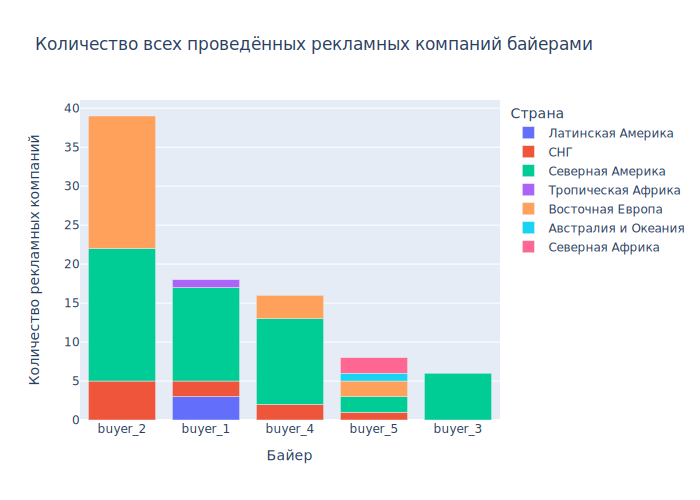

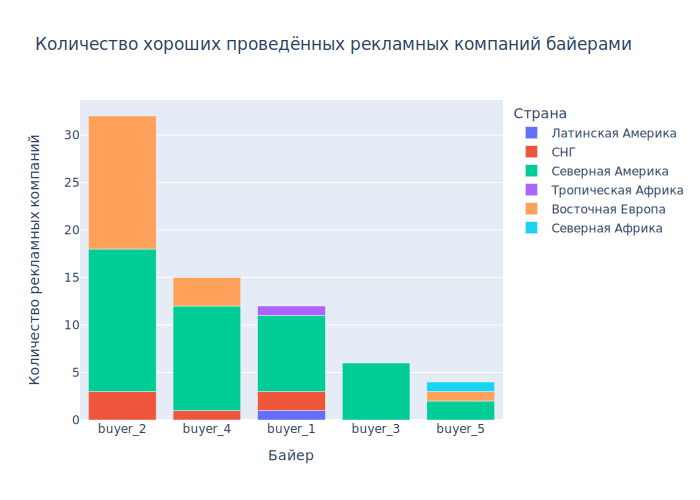

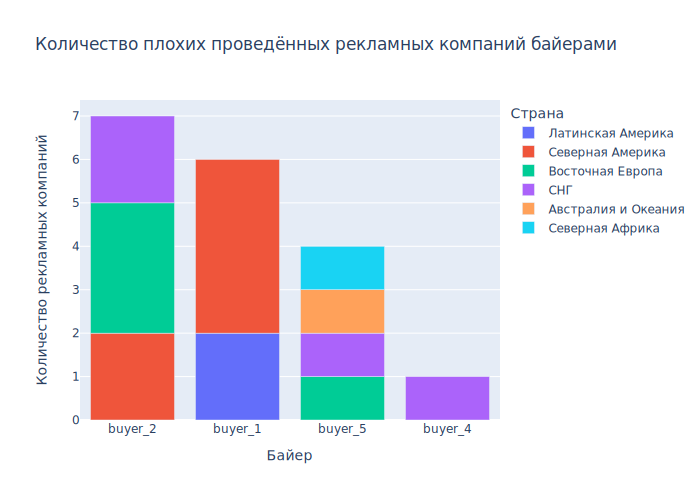

In [10]:
for name in all_data:
    count_comp(name)

**Выводы:**

Байер 1:

- Реклама заказана в:
    *  Северная Америка - 12 (из них окупившихся - 11)
    *  Латинская Америка - 3 (из них окупившихся - 1)
    *  СНГ - 2 (из них окупившихся - 2)
    *  Тропическая Африка - 1 (из них окупившихся - 1)

Байер 2:
- Реклама заказана в:
    *  Северная Америка - 17 (из них окупившихся - 15)
    *  Восточная Европа - 17 (из них окупившихся - 14)
    *  СНГ - 5 (из них окупившихся - 3)

Байер 3:

- Реклама заказана в:
    *  Северная Америка - 6 (из них окупившихся - 6)

Байер 4:

- Реклама заказана в:
    *  Северная Америка - 11 (из них окупившихся - 11)
    *  Восточная Европа - 3 (из них окупившихся - 3)
    *  СНГ - 2 (из них окупившихся - 1)

Байер 5:

- Реклама заказана в:
    *  Северная Америка - 2 (из них окупившихся - 2)
    *  Тропическая Африка - 2 (из них окупившихся - 1)
    *  Восточная Европа - 2 (из них окупившихся - 1)
    *  Латинская Америка - 3 (из них окупившихся - 0)
    *  СНГ - 1 (из них окупившихся - 0)
    *  Австралия и Океания - 1 (из них окупившихся - 0)

`С минимальными потерями/отлично справляется байеры 3 и 4`

In [11]:
def count_comp_revenue(df):
    # Группируем данные по байеру и географии проведения рекламной кампании
    data = df.groupby(['buyer', 'geo'], as_index=False).agg({'sum_revenue': 'sum'}) \
           .rename(columns={'sum_revenue': 'Сумма', 'geo': 'Страна'})

    fig = px.bar(data, x='buyer', y='Сумма', color='Страна',
                 title=f'Выручка {df.name} рекламных кампаний в разрезе стран')

    fig.update_xaxes(title_text='Байер')
    fig.update_xaxes(categoryorder='total descending')
    fig.update_yaxes(title_text='Сумма выручки')

    fig.show('svg')

In [12]:
revenue = df.groupby(['buyer'], as_index=False).agg({'CR': 'mean', 'CTR': 'mean',
                                                     'spend': 'sum', 'sum_revenue': 'sum'}) \
            .rename(columns={'spend': 'sum_spend'})

# Считаем разницу между затратами на рекламу и суммарной выручкой
revenue['dif, nature'] = revenue['sum_revenue'] - revenue['sum_spend']
revenue['dif, %'] = round(((revenue['sum_revenue'] / revenue['sum_spend'] * 100) - 100), 2)

# Сортируем таблицу по разнице в процентах из предыдущего шага
revenue = revenue.sort_values(by='dif, %', ascending=False)

display(revenue)

,buyer,CR,CTR,sum_spend,sum_revenue,"dif, nature","dif, %"
2,buyer_3,0.24,0.03,"983,800,701.00","4,020,270,330.00","3,036,469,629.00",308.65
3,buyer_4,0.26,0.03,"695,038,997.00","1,970,392,422.00","1,275,353,425.00",183.49
1,buyer_2,0.23,0.03,"5,685,256,884.00","12,547,866,163.00","6,862,609,279.00",120.71
0,buyer_1,0.16,0.04,"7,023,754,151.00","9,539,970,007.00","2,516,215,856.00",35.82
4,buyer_5,0.20,0.02,"456,234,563.00","490,834,396.00","34,599,833.00",7.58


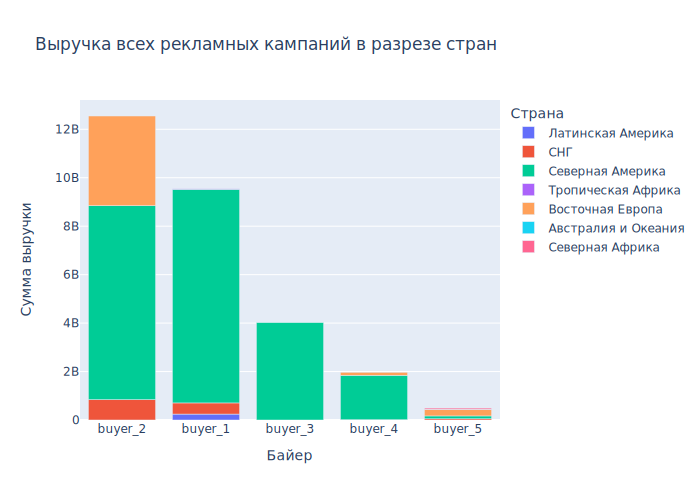

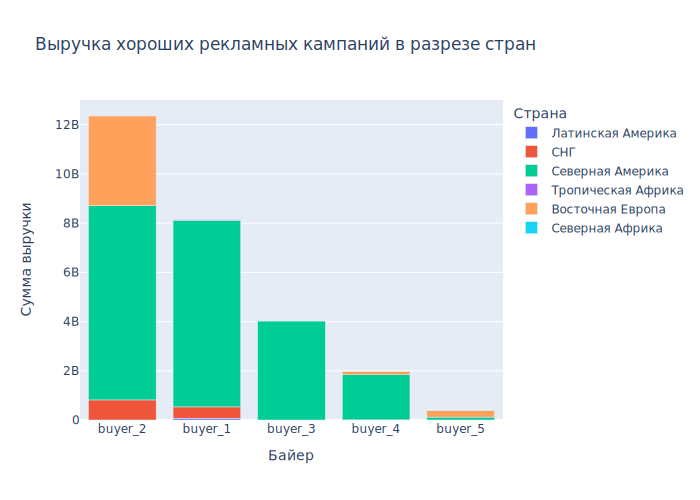

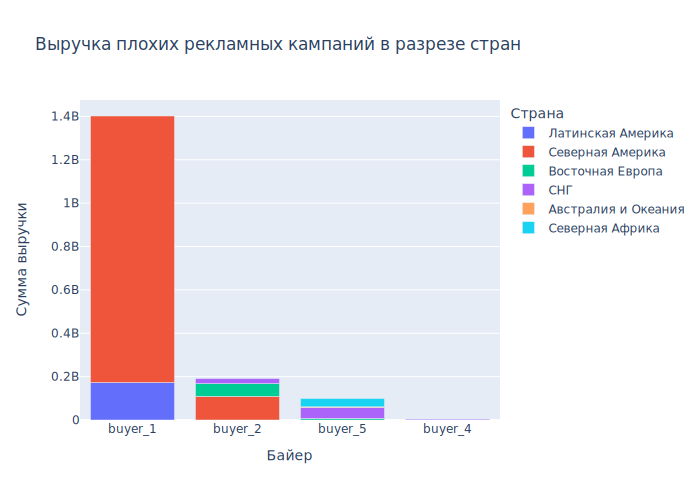

In [13]:
# Прорисуем графики для наглядности
for name in all_data:
    count_comp_revenue(name)

**Общие выводы:**

* Наибольшую эффективность показывает 3 байер (309% окупаемости). 3 и 4 байер несмоненные фавориты и на ближайшее сотрудничество;
* Наибольший успех и окупаемость приложения в Северной Америке;
* Первые попытки зайти в страны Австралии и Океании, Северную Африку не снискали успеха с имеющимися байерами. Стоит попробовать сотрудничество с другими байерами;
* Байер 3 - практически убыточный байер, следует рассмотреть возможность сотрнудничество с другим байером.
* Байер 2 - лидер по количеству рекламных кампаний.

Бонус: воронка событий для каждой рекламной кампании.

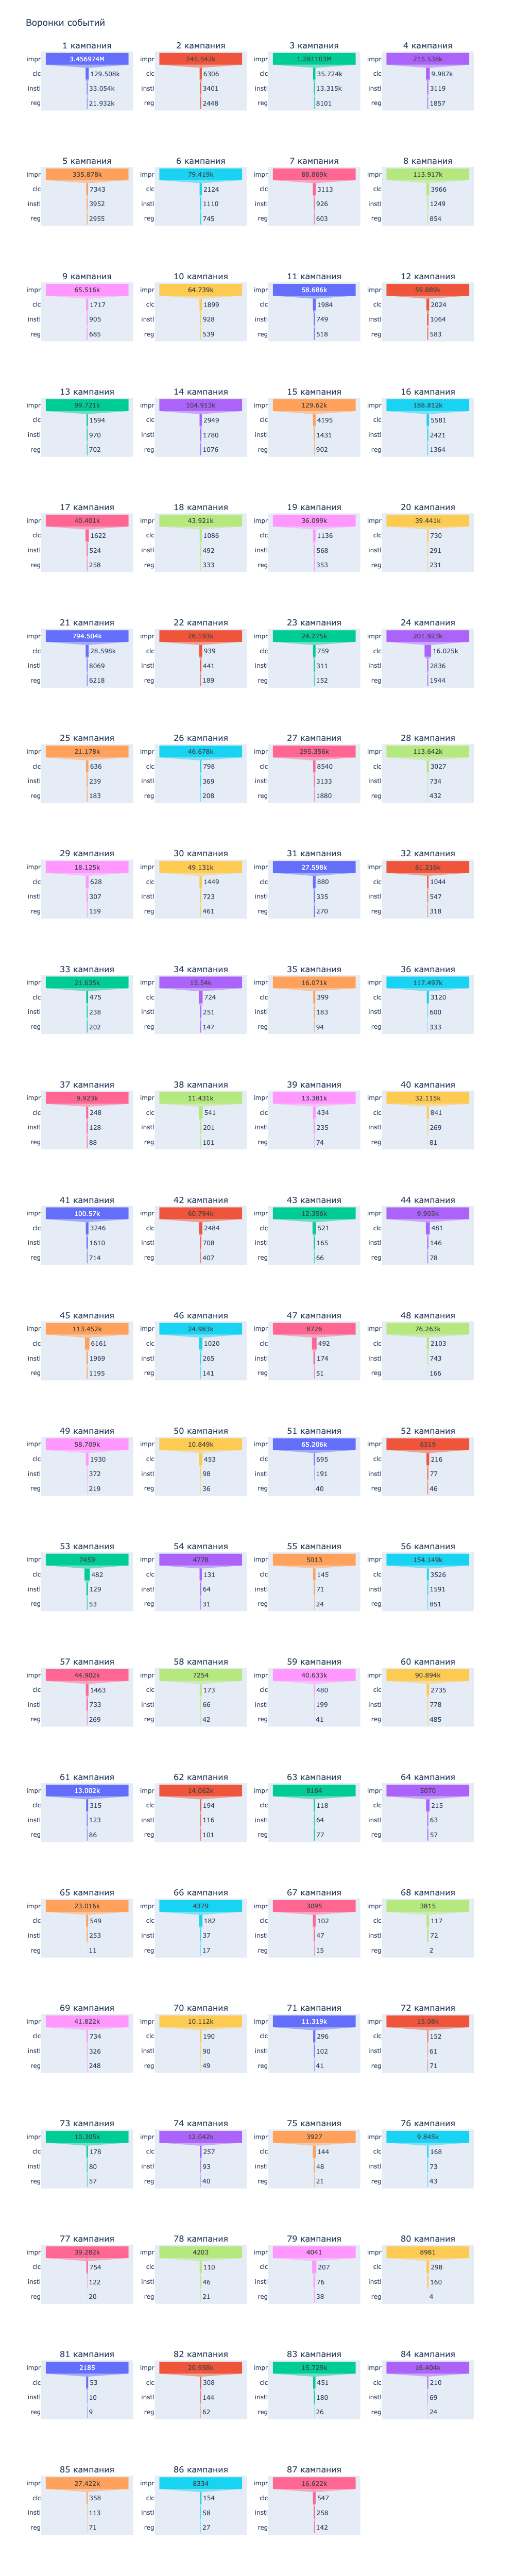

In [14]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

names = ['impr', 'clc', 'instl', 'reg']

sbp_titles = [f'{k} кампания' for k in df['campaign_id'].unique()]

fig = make_subplots(rows=22, cols=4, subplot_titles=sbp_titles)

index = 0

for i in range(1, 23):
    for j in range(1, 5):
        if index >= 87: pass
        else:
            number = [df['impressions'][index], df['clicks'][index], df['installs'][index], df['registrations'][index]]

            fig.add_trace(go.Funnel(x=number,
                                    y=names, showlegend=False),
                                    row=i, col=j)
            
            index +=1

fig.update_layout(height=5000, width=1000, title_text="Воронки событий")
fig.show('png')